<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Pytorch

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [2]:
%matplotlib inline

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [4]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 88070863.62it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 11690444.58it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 106866125.42it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 12963017.80it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [5]:
def show_data(data):
    """
    This method shows some sample data with labels
    """
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

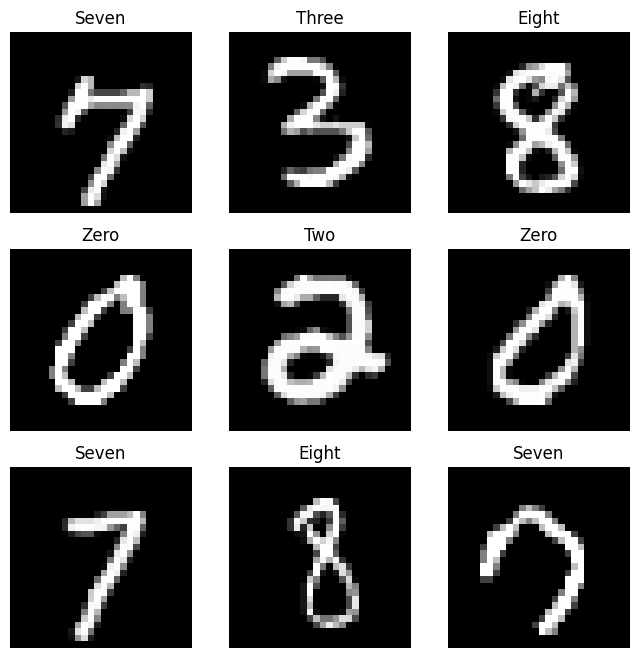

In [6]:
show_data(train_dataset)

In [7]:
def training(train_loader, num_epochs, model, criterion, optimizer, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        train_loader = training data
        model = base model
        epocs  = number of iteration the moedls will be trained
        optmizer =  'adam' or 'SGD'
        criterion = which used to evaluate the model
        verbose = to control logs
    """
    running_loss = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        if verbose == 0:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1} ------------------------')
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            labels_onehot = nn.functional.one_hot(labels, num_classes=10).float()  # Convert labels to one-hot encoding
            loss = criterion(outputs, labels_onehot)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'\tEpoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
        if verbose == 1:
            print(f'Epoch {epoch + 1}, Loss: {running_loss / 100}')

    print(f'Finished Training with loss = {running_loss / 100}')
    return model, running_loss/100

In [8]:
def evaluation(model, test_data):
    """
    Evaluate the model with test data
    """
    model.eval()
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on test set: {correct / total * 100}%')
    return correct, total, predictions


In [9]:
def show_sample_result(model, data, predictions):
    """
    Show A sample test data and what is the actual and predicted labels
    """
    image, label = data
    image = image.view(28, 28)
    image_numpy = image.numpy()
    plt.imshow(image_numpy, cmap='gray')
    plt.title(f'Predicted Label: {predictions}, Actual Label: {label}')
    plt.axis('off')
    plt.show()

## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 1.0268631333112717
	Epoch 1, Batch 200, Loss: 0.4460778547823429
	Epoch 1, Batch 300, Loss: 0.3983640870451927
	Epoch 1, Batch 400, Loss: 0.3634798659384251
	Epoch 1, Batch 500, Loss: 0.32300792567431924
	Epoch 1, Batch 600, Loss: 0.3274419394135475
	Epoch 1, Batch 700, Loss: 0.31044808484613895
	Epoch 1, Batch 800, Loss: 0.2584419278055429
	Epoch 1, Batch 900, Loss: 0.2553278499096632
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.2262325543165207
	Epoch 2, Batch 200, Loss: 0.22061034578830005
	Epoch 2, Batch 300, Loss: 0.19084757298231125
	Epoch 2, Batch 400, Loss: 0.18593624711036683
	Epoch 2, Batch 500, Loss: 0.20573407143354416
	Epoch 2, Batch 600, Loss: 0.17802481934428216
	Epoch 2, Batch 700, Loss: 0.17402205362915993
	Epoch 2, Batch 800, Loss: 0.18219311472028493
	Epoch 2, Batch 900, Loss: 0.163900134190917
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.1525344142317772
	Epoch 3, Batch 200

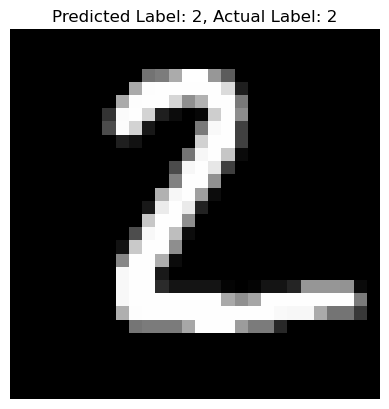

In [ ]:
"""
Base Model Architecture
"""
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLP()
model, _ = training(train_loader = train_loader,
                    num_epochs=5,
                    model=model,
                    criterion = nn.CrossEntropyLoss(),
                    optimizer = optim.Adam(model.parameters(), lr=0.001))
correct, total, predictions = evaluation(model=model, test_data=test_loader)
show_sample_result(model, test_dataset[1], predictions[1])

## Step 4. Choose one of the proposed modifications below:

### 1 - Add another Dense layer of 128 nodes

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 1.188450945019722
	Epoch 1, Batch 200, Loss: 0.48739294812083245
	Epoch 1, Batch 300, Loss: 0.37547490060329436
	Epoch 1, Batch 400, Loss: 0.35767262920737264
	Epoch 1, Batch 500, Loss: 0.3250816647708416
	Epoch 1, Batch 600, Loss: 0.28228757046163083
	Epoch 1, Batch 700, Loss: 0.27343472354114057
	Epoch 1, Batch 800, Loss: 0.2605032993853092
	Epoch 1, Batch 900, Loss: 0.2417395218461752
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.2160670282319188
	Epoch 2, Batch 200, Loss: 0.2141189308091998
	Epoch 2, Batch 300, Loss: 0.1883342356607318
	Epoch 2, Batch 400, Loss: 0.1831350789964199
	Epoch 2, Batch 500, Loss: 0.21013588156551122
	Epoch 2, Batch 600, Loss: 0.17026631362736225
	Epoch 2, Batch 700, Loss: 0.18569135449826718
	Epoch 2, Batch 800, Loss: 0.1690811438113451
	Epoch 2, Batch 900, Loss: 0.15970588639378547
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.1275419201143086
	Epoch 3, Batch 200

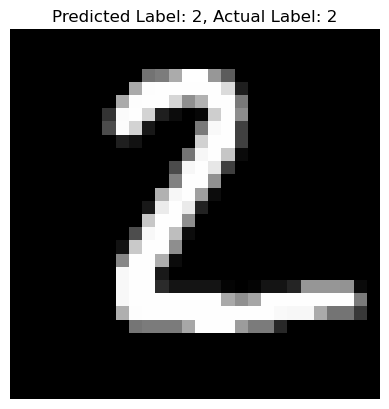

In [ ]:
"""
Added a extra layer in the model
"""
class MLP_New_Layer(nn.Module):
    def __init__(self):
        super(MLP_New_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model_new_layer = MLP_New_Layer()

model_new_layer, _ = training(train_loader=train_loader,
                              num_epochs=5,
                              model=model_new_layer,
                              criterion = nn.CrossEntropyLoss(),
                              optimizer = optim.Adam(model_new_layer.parameters(), lr=0.001))

correct_new_layer, total_new_layer, predictions_new_layer = evaluation(model=model_new_layer,
                                                                       test_data=test_loader)
show_sample_result(model_new_layer, test_dataset[1], predictions_new_layer[1])

### Increase the current number of nodes in the layer to 256

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 0.9202182921767235
	Epoch 1, Batch 200, Loss: 0.41956120386719703
	Epoch 1, Batch 300, Loss: 0.3435780270397663
	Epoch 1, Batch 400, Loss: 0.3311793060600758
	Epoch 1, Batch 500, Loss: 0.28712649643421173
	Epoch 1, Batch 600, Loss: 0.24901006408035756
	Epoch 1, Batch 700, Loss: 0.2630591026693583
	Epoch 1, Batch 800, Loss: 0.2245903965830803
	Epoch 1, Batch 900, Loss: 0.24206788823008538
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.18633436668664216
	Epoch 2, Batch 200, Loss: 0.17228918887674807
	Epoch 2, Batch 300, Loss: 0.16231614883989096
	Epoch 2, Batch 400, Loss: 0.18332886680960656
	Epoch 2, Batch 500, Loss: 0.1725178080238402
	Epoch 2, Batch 600, Loss: 0.15483795648440718
	Epoch 2, Batch 700, Loss: 0.14038379807025195
	Epoch 2, Batch 800, Loss: 0.14267707772552968
	Epoch 2, Batch 900, Loss: 0.1522059490904212
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.12389752829447388
	Epoch 3, Batch

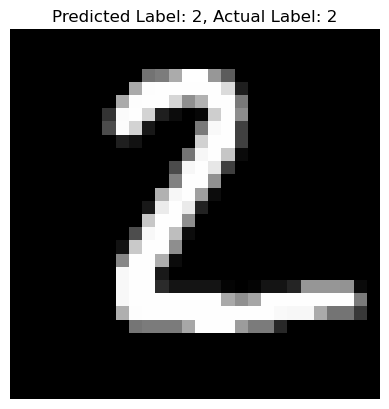

In [ ]:
"""
Make a exisitng layer wide
"""
class MLP_Wide_Layer(nn.Module):
    def __init__(self):
        super(MLP_Wide_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model_wide_layer = MLP_Wide_Layer()
model_wide_layer, _ = training(train_loader=train_loader,
                               num_epochs = 5,
                               model = model_wide_layer,
                               criterion = nn.CrossEntropyLoss(),
                               optimizer = optim.Adam(model_wide_layer.parameters(), lr=0.001))


correct_wide_layer, total_wide_layer, predictions_wide_layer = evaluation(model=model_wide_layer,
                                                                          test_data=test_loader)
show_sample_result(model_wide_layer, test_dataset[1], predictions_wide_layer[1])

## Step 6. Report on the results of the modified model and if it matches your hypothesis

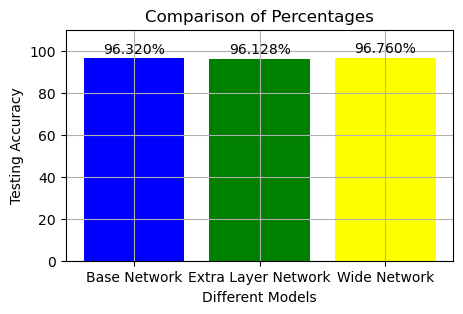

In [ ]:
"""
Performance Comparisions for the differnet models
"""
base_accuracy = correct / total * 100
new_layer_accuracy = correct_new_layer / total * 100
wide_accuracy = correct_wide_layer / total * 100

labels = ['Base Network', 'Extra Layer Network', 'Wide Network']

values = [base_accuracy, new_layer_accuracy, wide_accuracy]

plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()

## Observation

    - From the bar chart its clear that all three models works great and achieving more than 92% test accuracy.
    - But we can also see that wide layer models works with best accuracy.
    - If we rerun the training it will change, so we need more epochs  for any conclusion.

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [10]:
"""
Defining a model class which have a variable dropout and activation functions.
So that we can measure the performance for each of the model
"""
class MLP_Flex(nn.Module):
    def __init__(self, activation_function, dropout):
        super(MLP_Flex, self).__init__()
        self.activation_function = activation_function
        self.dropout = dropout
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout_fuction = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_function(self.fc1(x))
        x = self.dropout_fuction(x)
        x = self.activation_function(self.fc2(x))
        x = self.dropout_fuction(x)
        x = self.fc3(x)
        return x


In [ ]:
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.0, 0.2, 0.5]
activation_functions = [nn.ReLU(), nn.Sigmoid()]

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss"].append(loss_function.__class__.__name__)
                result["activation"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                model, training_loss = training(train_loader = train_loader,
                                                num_epochs = 5,
                                                model = model,
                                                criterion = loss_function,
                                                optimizer = optimizer(model.parameters(), lr=0.001),
                                                verbose = 2)
                correct, total, predictions = evaluation(model=model, test_data=test_loader)

                result["training_loss"].append(training_loss)
                result["test_accuracy"].append(correct/total*100)



	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.0
Finished Training with loss = 0.061539984252303837
Accuracy on test set: 96.17999999999999%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.0
Finished Training with loss = 0.07851695243734866
Accuracy on test set: 95.84666666666666%

	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.2
Finished Training with loss = 0.15089403073769062
Accuracy on test set: 94.95166666666667%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 0.1215353919705376
Accuracy on test set: 95.09166666666667%

	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.5
Finished Training with loss = 0.45030427142977714
Accuracy on test set: 89.455%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.5
Finished Training with loss = 0.2515636919438839
Accuracy on test set: 93.11333333333334%

	Training optimizer=Adam,loss=CrossEntropyLoss,activat

In [ ]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,test_accuracy,name
0,Adam,MSELoss,0.0,ReLU,0.061540,96.180000,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
1,Adam,MSELoss,0.0,Sigmoid,0.078517,95.846667,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
2,Adam,MSELoss,0.2,ReLU,0.150894,94.951667,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
3,Adam,MSELoss,0.2,Sigmoid,0.121535,95.091667,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
4,Adam,MSELoss,0.5,ReLU,0.450304,89.455000,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
5,Adam,MSELoss,0.5,Sigmoid,0.251564,93.113333,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
6,Adam,CrossEntropyLoss,0.0,ReLU,0.862358,96.213333,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
7,Adam,CrossEntropyLoss,0.0,Sigmoid,0.898495,96.313333,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
8,Adam,CrossEntropyLoss,0.2,ReLU,1.665494,96.153333,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
9,Adam,CrossEntropyLoss,0.2,Sigmoid,1.593102,95.806667,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."


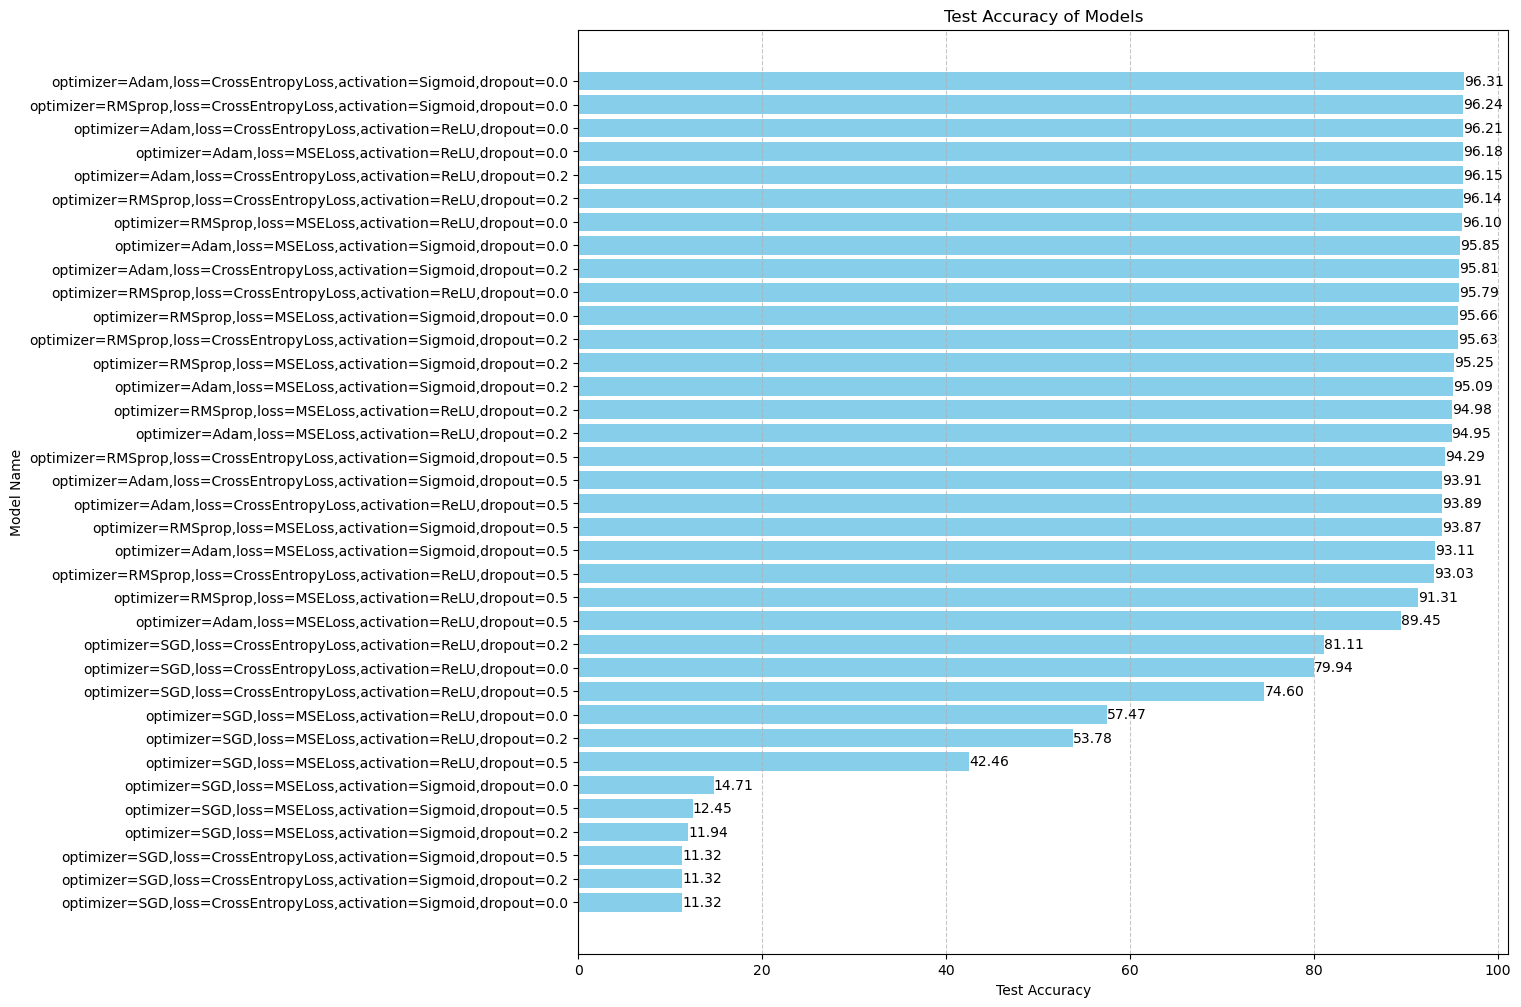

In [ ]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(12, 12))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Observations -

* We can see that most of hyper parameters are working as great and have accuracy very close to each other.
* but the some combinations are not working as expected, but SGD optmizer is not working good with Sigmoid Activation function.
* Increaseing value of dropout more than 0.2 is not helping.
* Adam Optimizer and RMS Prop is working consistently good, but SGD (Schtocastic Gradient Descent) is not working well, as we are training our models for 5 epochs, so increasing the epochs will also increase the model performance. We can see the below results which verifies the claim.


In [11]:
optimizers = [optim.SGD]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.2]
activation_functions = [nn.Sigmoid()]

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss"].append(loss_function.__class__.__name__)
                result["activation"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                model, training_loss = training(train_loader = train_loader,
                                                num_epochs = 20,
                                                model = model,
                                                criterion = loss_function,
                                                optimizer = optimizer(model.parameters(), lr=0.001),
                                                verbose = 2)
                correct, total, predictions = evaluation(model=model, test_data=test_loader)
                result["training_loss"].append(training_loss)
                result["test_accuracy"].append(correct/total*100)



	Training optimizer=SGD,loss=MSELoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 0.9393958042562008
Accuracy on test set: 24.25%

	Training optimizer=SGD,loss=CrossEntropyLoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 21.120258610248566
Accuracy on test set: 25.983333333333334%
